<a href="https://colab.research.google.com/github/Ruqyai/ds/blob/master/unit3/titanic-survivors/solution_challenge_titanic_survivors_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget https://raw.githubusercontent.com/codeforgirls-sa/ds/master/unit3/titanic-survivors/titanic.csv

dataset = pd.read_csv('titanic.csv')

--2020-06-22 12:55:39--  https://raw.githubusercontent.com/codeforgirls-sa/ds/master/unit3/titanic-survivors/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45774 (45K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  44.70K  --.-KB/s    in 0.02s   

2020-06-22 12:55:39 (2.89 MB/s) - ‘titanic.csv’ saved [45774/45774]



In [3]:

dataset.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,Survived
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1
4,5,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0


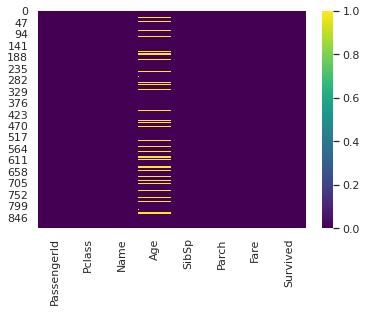

In [4]:
# Check if there are any missing values
sns.set()
sns.heatmap(dataset.isnull(), cmap='viridis')
# plt.show()


In [5]:
# Missing values are found in Age and Cabin columns. We can solve Age only by fill them with the median or avg
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())


In [6]:
# Feature Engineering
features = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
target = dataset['Survived']

# Split dataset into training set and test set 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(dataset[features], target, test_size=0.3, random_state=0)


In [7]:
# Create the model
clf = DecisionTreeClassifier(max_depth=4)

# Train the model
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred)*100)  # 75.0

Accuracy: 74.6268656716418
